In [1]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [2]:
# Import the libraries
import functions
import dictionaries

In [3]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

In [4]:
# Load the olr and precip data
olr, time_olr, datetimes_olr, con_olr = functions.load_olr_data(dictionaries.data_file)

# Load the precip data
precip, time_precip, datetimes_precip, con_precip = functions.load_precip_data(dictionaries.precip)

In [5]:
# Set up the directory to save the data
savedir, plot_dir = functions.setup_directories()

In [6]:
# Extract longitude and latitude
longitude,latitude=np.meshgrid(olr.coord('longitude').points,olr.coord('latitude').points)

# Calculate dxy
dxy, dt = functions.calculate_dxy(longitude, latitude, olr)

In [7]:
#sigma = dictionaries.sigma

#tf = (olr.data/sigma)**(0.25)
#tb_var = (-dictionaries.a + np.sqrt(dictionaries.a**2 + 4*dictionaries.b*tf.data))/(2*dictionaries.b)

In [8]:
# Calculate brightness temperatures
tf, tb_var, tb = functions.calculate_temperatures(dictionaries.a, dictionaries.b, dictionaries.sigma, olr)

In [9]:
# Set up the parameters dictionaries
# features parameters
parameters_features = functions.setup_parameters_features(dictionaries.position_threshold, dictionaries.sigma_threshold, dictionaries.target, dictionaries.threshold, dictionaries.n_min_threshold)

# segmentation parameters
parameters_segmentation = functions.setup_parameters_segmentation(dictionaries.target, dictionaries.method, dictionaries.threshold)

# linking parameters
parameters_linking = functions.setup_parameters_linking(dictionaries.n_min_threshold, dictionaries.stubs, dictionaries.order, dictionaries.extrapolate, dictionaries.memory, dictionaries.adaptive_stop, dictionaries.adaptive_step, dictionaries.subnetwork_size, dictionaries.method_linking)

In [10]:
# Now perform the sensitivity analysis
print("Values of nminthreshold to be tested: ", dictionaries.n_min_threshold_values)
n_min_threshold_values=dictionaries.n_min_threshold_values

# Call the sensitivity analysis function
functions.perform_sensitivity_analysis(tb, savedir, parameters_features, parameters_segmentation, parameters_linking, n_min_threshold_values)

Frame 743: 15 trajectories present.
[15.41208663 14.96483032 13.62139305 13.51560577  5.31575733  9.83579727
  4.30741035 11.29000936 10.92441901 12.33185376 13.94114745 11.09677089
 10.25983436 10.39047145 14.83634579 19.9865213   5.22712538 15.27717952
 15.56996267 14.46463979 16.31609422  5.22739154 36.68178239 15.86786987
 13.21381708  5.89843844 19.34771043 15.63667518 23.98965084 28.42265546
 15.28534004 10.51110221 14.3501696  21.35294774 27.94644531 10.29671981
 10.99376489 19.59365839 29.29091992 11.81849931  9.38204334 11.4597323
  8.95412299 22.81967398 11.98020003  3.97569234  8.86491626 11.71754558
 10.89266174 12.78043057 23.74068672 13.74538767 13.54303445 14.51743005
 13.61623145  7.13193988 10.32835725 16.54068182 16.62377397 12.3930956
 16.39454293 16.85286298  6.93688893 11.45425982  2.7141669  14.58342504
  5.99138374 11.26427175 12.89176572 21.92860172  4.86253717 16.90621702
 12.25116647 16.73567005 11.15459953 20.99825604 15.84536088 31.93503853
 10.7901109  18.6

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,n_min_threshold
0,61409,42516.363852,2.153253e+06,2892.857143,2628,9.863775,81.0,6.0,14.108170,73.721491,1.085753,118
1,15150,133990.895901,2.148459e+06,22601.892857,659,10.866464,77.0,6.0,13.138582,43.073255,1.928084,987
2,11265,168387.772304,2.148459e+06,34132.821429,494,10.890688,77.0,6.0,13.376839,37.664397,2.891097,1481
3,10891,172723.783719,2.148459e+06,34132.821429,478,10.983264,77.0,6.0,13.409940,37.664397,2.891097,1550
4,9120,196724.665977,2.148459e+06,45557.437500,414,10.818841,77.0,6.0,13.861221,47.544487,2.714167,1975
5,7626,226563.805967,2.241349e+06,55872.642857,343,10.959184,77.0,6.0,13.900718,48.533643,2.714167,2469


In [11]:
df = pd.read_csv('Save/Jan_2000/n_min_threshold/sensitivity_analysis_nminthreshold.csv')

In [12]:
df

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,n_min_threshold
0,61409,42516.363852,2.153253e+06,2892.857143,2628,9.863775,81.0,6.0,14.108170,73.721491,1.085753,118
1,15150,133990.895901,2.148459e+06,22601.892857,659,10.866464,77.0,6.0,13.138582,43.073255,1.928084,987
2,11265,168387.772304,2.148459e+06,34132.821429,494,10.890688,77.0,6.0,13.376839,37.664397,2.891097,1481
3,10891,172723.783719,2.148459e+06,34132.821429,478,10.983264,77.0,6.0,13.409940,37.664397,2.891097,1550
4,9120,196724.665977,2.148459e+06,45557.437500,414,10.818841,77.0,6.0,13.861221,47.544487,2.714167,1975
5,7626,226563.805967,2.241349e+06,55872.642857,343,10.959184,77.0,6.0,13.900718,48.533643,2.714167,2469


In [13]:
# #plot of single Tb sensitivity analysis for MCSs
# import seaborn as sns 
# sns.set(font_scale=1.2)

# plt.figure(figsize=(24,14))
# f= 20
# lf= 15

# xticks=[225,230,235,240,245]
# ax1=plt.subplot(2,3,(1,4))
# ax1.set_title('a) Total track number ', loc='left', fontsize= f )
# ax1.plot(df['threshold'],df['num_tracks'],linewidth=3)
# ax1.set_xticks(xticks)
# ax1.set_ylabel('no. MCS tracks (01-01-1998 - 31-01-1998)')
# ax1.set_xlabel('brightness temperature (K)')

# ax2=plt.subplot(2,3,2)
# ax2.set_title('b) Detected features ', loc='left', fontsize= f )
# ax2.plot(df['threshold'],df['num_features'],linewidth=3)
# ax2.set_xticks(xticks)
# ax2.set_ylabel('no. detected features (01-01-1998 - 31-01-1998)')
# ax2.set_xlabel('brightness temperature (K)')

# ax3=plt.subplot(2,3,3)
# ax3.set_title('c) Area ', loc='left', fontsize= f )
# ax3.plot(df['threshold'],df['mean_area'],linewidth=3)
# ax3.set_xticks(xticks)
# ax3.set_ylabel('mean MCS area (km$^{2}$)')
# ax3.set_xlabel('brightness temperature (K)')

# ax4=plt.subplot(2,3,5)
# ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
# ax4.plot(df['threshold'],df['mean_lifetime'],linewidth=3)
# ax4.set_xticks(xticks)
# ax4.set_ylabel('mean MCS lifetime (hrs)')
# ax4.set_xlabel('brightness temperature (K)')

# ax5=plt.subplot(2,3,6)
# ax5.set_title('d) Velocity ', loc='left', fontsize= f )
# ax5.plot(df['threshold'],df['mean_velocity'],linewidth=3)
# ax5.set_xticks(xticks)
# ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
# ax5.set_xlabel('brightness temperature (K)')

# plt.savefig('Plot/Jan_1998/singleTb/single_tb_analysis.png')


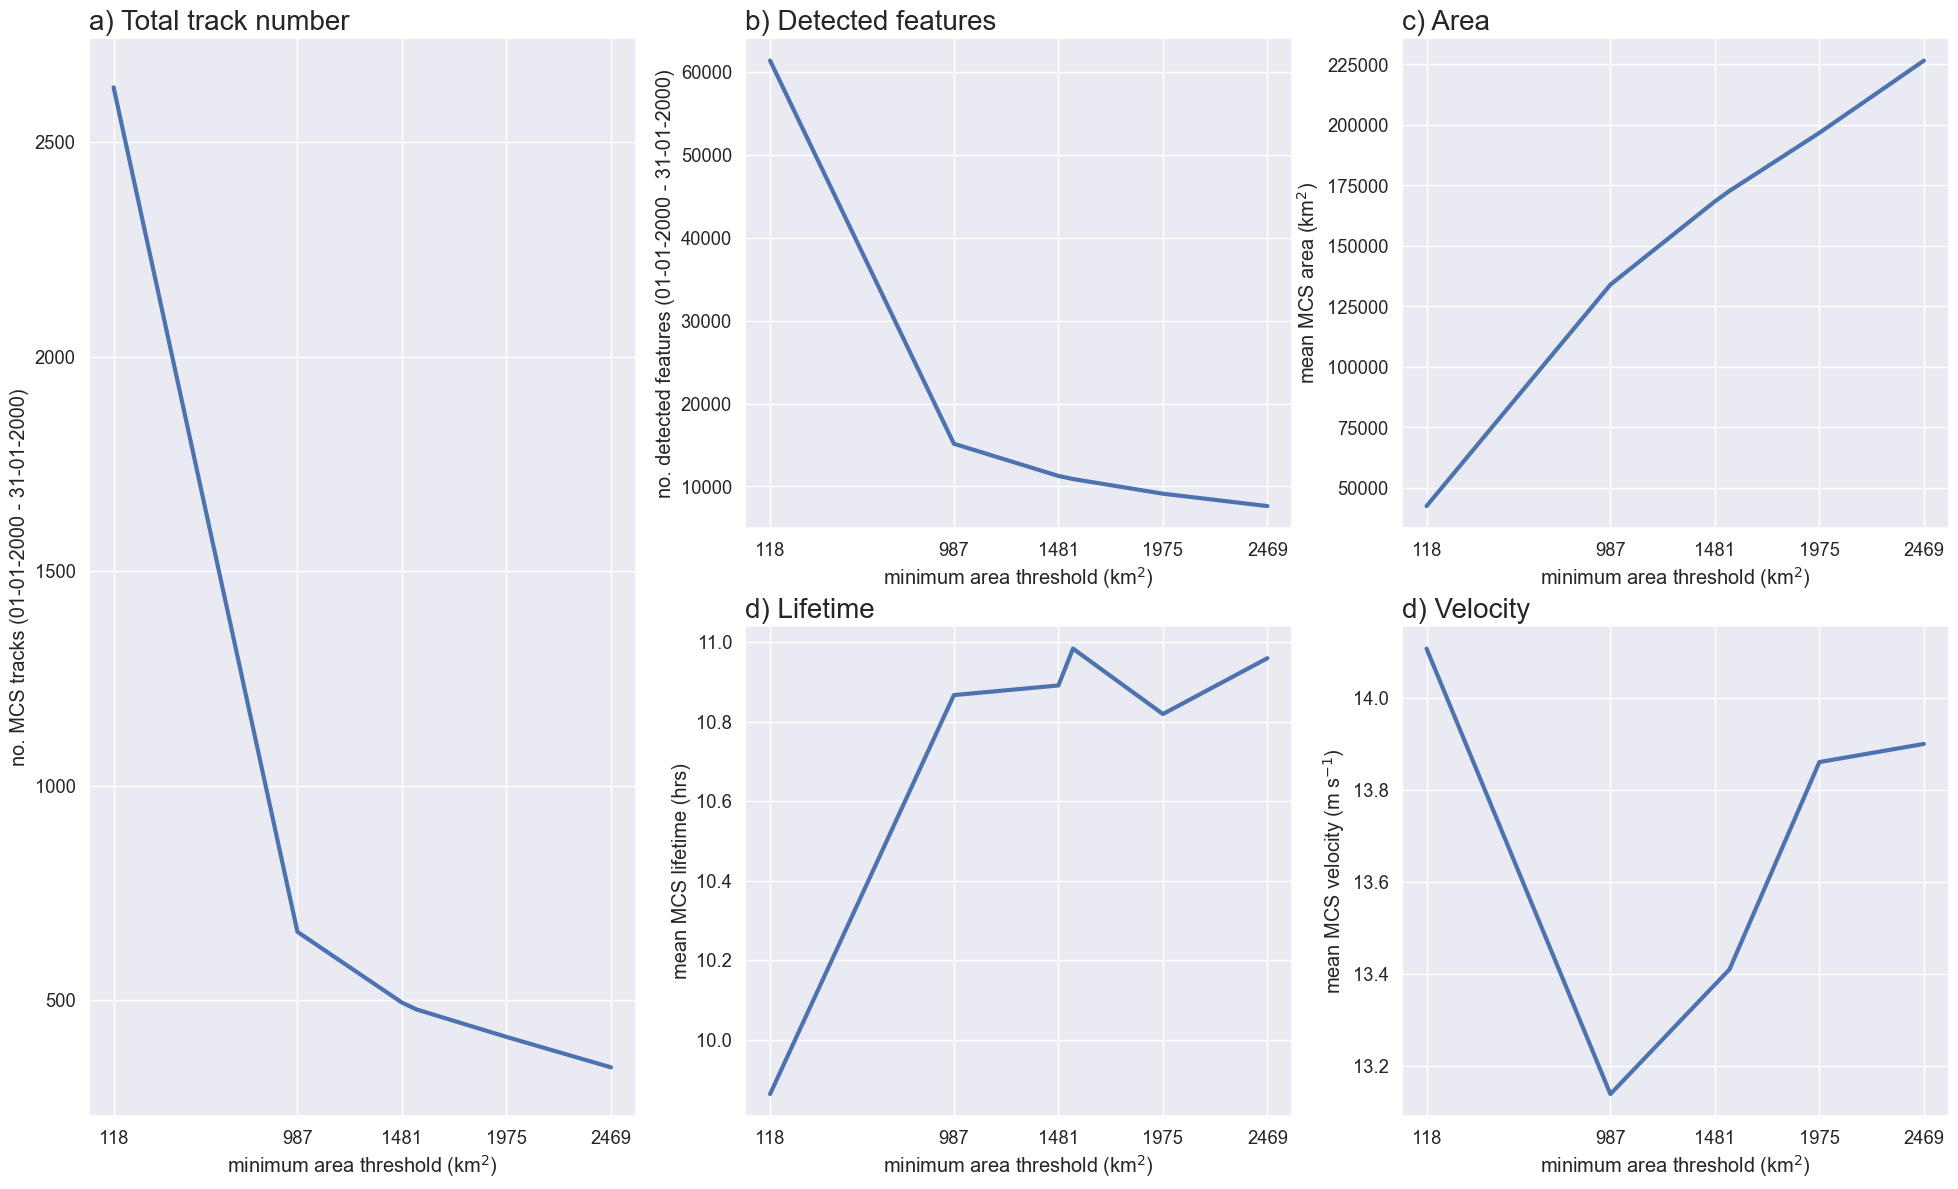

In [14]:
#plot of nminthreshold sensitivity analysis for MCSs
import seaborn as sns 
sns.set(font_scale=1.2)

plt.figure(figsize=(24,14))
f= 20
lf= 15

xticks=[118,987,1481,1975,2469]
ax1=plt.subplot(2,3,(1,4))
ax1.set_title('a) Total track number ', loc='left', fontsize= f )
ax1.plot(df['n_min_threshold'],df['num_tracks'],linewidth=3)
ax1.set_xticks(xticks)
ax1.set_ylabel('no. MCS tracks (01-01-2000 - 31-01-2000)')
ax1.set_xlabel('minimum area threshold (km$^{2}$)')

ax2=plt.subplot(2,3,2)
ax2.set_title('b) Detected features ', loc='left', fontsize= f )
ax2.plot(df['n_min_threshold'],df['num_features'],linewidth=3)
ax2.set_xticks(xticks)
ax2.set_ylabel('no. detected features (01-01-2000 - 31-01-2000)')
ax2.set_xlabel('minimum area threshold (km$^{2}$)')

ax3=plt.subplot(2,3,3)
ax3.set_title('c) Area ', loc='left', fontsize= f )
ax3.plot(df['n_min_threshold'],df['mean_area'],linewidth=3)
ax3.set_xticks(xticks)
ax3.set_ylabel('mean MCS area (km$^{2}$)')
ax3.set_xlabel('minimum area threshold (km$^{2}$)')

ax4=plt.subplot(2,3,5)
ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
ax4.plot(df['n_min_threshold'],df['mean_lifetime'],linewidth=3)
ax4.set_xticks(xticks)
ax4.set_ylabel('mean MCS lifetime (hrs)')
ax4.set_xlabel('minimum area threshold (km$^{2}$)')

ax5=plt.subplot(2,3,6)
ax5.set_title('d) Velocity ', loc='left', fontsize= f )
ax5.plot(df['n_min_threshold'],df['mean_velocity'],linewidth=3)
ax5.set_xticks(xticks)
ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
ax5.set_xlabel('minimum area threshold (km$^{2}$)')

plt.savefig('Plot/Jan_2000/nminthreshold/nminthreshold_analysis.png')
